# Logistic Regression

We'll be working with a dataset containing data on 644 applicants with the following columns:

- `gre` - applicant's score on the Graduate Record Exam, a generalized test for
prospective graduate students (Score ranges from 200 to 800)
- `gpa` - college grade point average (Continuous between 0.0 and 4.0)
- `admit` - binary value (Binary value, 0 or 1, where 1 means the applicant was admitted to the program and 0 means the applicant was rejected)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

### Exploring the Data

In [2]:
admissions = pd.read_csv('admissions.csv')

In [3]:
admissions.head(10)

,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399
3,0,3.093559,551.089985
4,0,3.141923,537.184894
5,0,3.599108,442.763567
6,0,3.238972,667.472189
7,0,3.420177,561.713905
8,0,3.562482,590.340371
9,0,3.910495,463.470183


In [4]:
admissions.shape

(644, 3)

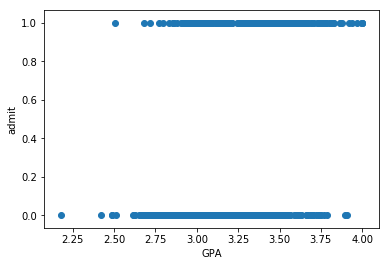

In [5]:
plt.scatter(x = admissions['gpa'], y = admissions['admit'])
plt.xlabel('GPA')
plt.ylabel('admit')
plt.show()

### Logistic function

In [6]:
def logistic(x):
    return np.exp(x)  / (1 + np.exp(x)) 

In [7]:
# Generate 50 real values, evenly spaced, between -6 and 6

x = np.linspace(-6,6,50, dtype=float)

In [8]:
# Transform each number in t using the logistic function

y = logistic(x)

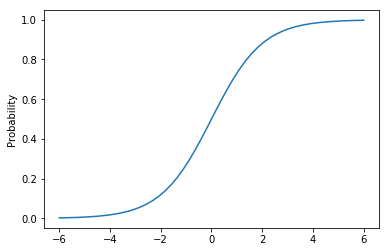

In [9]:
# Plot the resulting data

plt.plot(x, y)
plt.ylabel("Probability")
plt.show()

### Training a logistic regression model

In [10]:
linear_model = LinearRegression()
linear_model.fit(admissions[["gpa"]], admissions["admit"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Visualizing the probabilities

In [12]:
pred_probs = logistic_model.predict_proba(admissions[["gpa"]])
pred_probs

array([[0.63387918, 0.36612082],
       [0.57129471, 0.42870529],
       [0.74047131, 0.25952869],
       ...,
       [0.64994531, 0.35005469],
       [0.53382227, 0.46617773],
       [0.53831911, 0.46168089]])

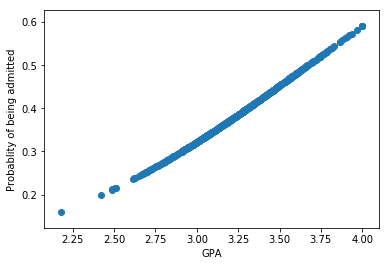

In [13]:
plt.scatter(admissions["gpa"], pred_probs[:,1])
plt.xlabel('GPA')
plt.ylabel('Probablity of being admitted')
plt.show()

### Predicting the labels

In [14]:
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])
fitted_labels = logistic_model.predict(admissions[["gpa"]])

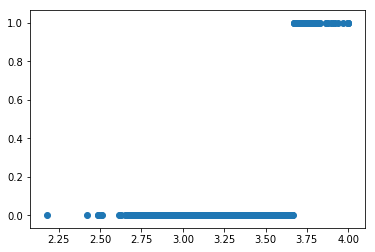

In [15]:
plt.scatter(admissions["gpa"], fitted_labels)
plt.show()

In [19]:
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gre"]], admissions["admit"])
fitted_labels = logistic_model.predict(admissions[["gre"]])

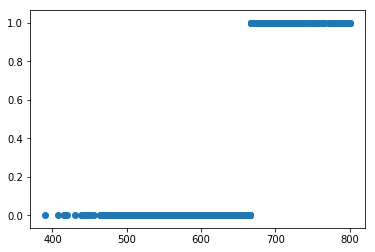

In [21]:
plt.scatter(admissions["gre"], fitted_labels)
plt.show()